# SwinIR Online Demo on Real-World Image SR for comparison with BSRGAN (ICCV2021) and Real-ESRGAN

[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2108.10257)
[![GitHub Stars](https://img.shields.io/github/stars/JingyunLiang/SwinIR?style=social)](https://github.com/JingyunLiang/SwinIR)
[![download](https://img.shields.io/github/downloads/JingyunLiang/SwinIR/total.svg)](https://github.com/JingyunLiang/SwinIR/releases)

This is a **SwinIR online demo on Real-World Image SR** of our paper [''SwinIR: Image Restoration Using Swin Transformer''](https://arxiv.org/abs/2108.10257).

SwinIR achieves state-of-the-art performance on six tasks: image super-resolution (including classical, lightweight and real-world image super-resolution), image denoising (including grayscale and color image denoising) and JPEG compression artifact reduction. See our [paper](https://arxiv.org/abs/2108.10257) and [project page](https://github.com/JingyunLiang/SwinIR) for detailed results. In particular, we train the real-world image SR model by using **the first practical degradation model [BSRGAN, ICCV2021](https://github.com/cszn/BSRGAN)**. We also refer to a recent model [Real-ESRGAN](https://arxiv.org/abs/2107.10833) for better loss function.

<img src="https://raw.githubusercontent.com/JingyunLiang/SwinIR/main/figs/real_world_image_sr.png" width="100%">



# 1. Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU
* Broswer != Firefox (cannot upload images in step 2)

in the **Runtime** menu -> **Change runtime type**

Then, we clone the repository, set up the envrironment, and download the pre-trained model.

In [ ]:
# Clone realESRGAN
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop

# Clone BSRGAN
!git clone https://github.com/cszn/BSRGAN.git

!rm -r SwinIR
# Clone SwinIR
!git clone https://github.com/JingyunLiang/SwinIR.git
!pip install timm

# Download the pre-trained models
!wget https://github.com/cszn/KAIR/releases/download/v1.0/BSRGAN.pth -P BSRGAN/model_zoo
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P experiments/pretrained_models
!wget https://github.com/JingyunLiang/SwinIR/releases/download/v0.0/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth -P experiments/pretrained_models
!wget https://github.com/JingyunLiang/SwinIR/releases/download/v0.0/003_realSR_BSRGAN_DFOWMFC_s64w8_SwinIR-L_x4_GAN.pth -P experiments/pretrained_models

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 755, done.
remote: Total 755 (delta 0), reused 0 (delta 0), pack-reused 755
Receiving objects: 100% (755/755), 5.38 MiB | 11.91 MiB/s, done.
Resolving deltas: 100% (406/406), done.
/content/Real-ESRGAN
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 34.7 MB/s eta 0:00:00
  Created wheel for basicsr: filename=basicsr-1.4.2-py3-none-any.whl size=214817 sha256=bd5070cf06adb15ae4934c3a60230b0618a1a4eb4b91e291acaa843c8bfbc7e0
  Stored in directory: /root/.cache/pip/wheels/38/83/99/2d8437cc652a01af27df5ff037a4075e95b52d67705c5f30ca
Successfully built basicsr
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 1.8 MB/s eta 0:00:00
    

# 2. Upload Images

Upload the images to be processed by SwinIR

In [ ]:
import os
import glob
from google.colab import files
import shutil
print(' Note1: You can find an image on the web or download images from the RealSRSet (proposed in BSRGAN, ICCV2021) at https://github.com/JingyunLiang/SwinIR/releases/download/v0.0/RealSRSet+5images.zip.\n Note2: You may need Chrome to enable file uploading!\n Note3: If out-of-memory, set test_patch_wise = True.\n')

# test SwinIR by partioning the image into patches
test_patch_wise = False

# to be compatible with BSRGAN
!rm -r BSRGAN/testsets/RealSRSet
upload_folder = 'BSRGAN/testsets/RealSRSet'
result_folder = 'results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

 Note1: You can find an image on the web or download images from the RealSRSet (proposed in BSRGAN, ICCV2021) at https://github.com/JingyunLiang/SwinIR/releases/download/v0.0/RealSRSet+5images.zip.
 Note2: You may need Chrome to enable file uploading!
 Note3: If out-of-memory, set test_patch_wise = True.



Saving R72140.jpg to R72140.jpg
move R72140.jpg to BSRGAN/testsets/RealSRSet/R72140.jpg


# 3. Inference


In [ ]:
# BSRGAN
!rm -r results
if not test_patch_wise:
  %cd BSRGAN
  !python main_test_bsrgan.py
  %cd ..
  shutil.move('BSRGAN/testsets/RealSRSet_results_x4', 'results/BSRGAN')

# realESRGAN
if test_patch_wise:
  !python inference_realesrgan.py -n RealESRGAN_x4plus --input BSRGAN/testsets/RealSRSet -s 4 --output results/realESRGAN --tile 800
else:
  !python inference_realesrgan.py -n RealESRGAN_x4plus --input BSRGAN/testsets/RealSRSet -s 4 --output results/realESRGAN

# SwinIR
if test_patch_wise:
  !python SwinIR/main_test_swinir.py --task real_sr --model_path experiments/pretrained_models/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth --folder_lq BSRGAN/testsets/RealSRSet --scale 4 --tile 800
else:
  !python SwinIR/main_test_swinir.py --task real_sr --model_path experiments/pretrained_models/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth --folder_lq BSRGAN/testsets/RealSRSet --scale 4
shutil.move('results/swinir_real_sr_x4', 'results/SwinIR')

# SwinIR-Large
if test_patch_wise:
  !python SwinIR/main_test_swinir.py --task real_sr --model_path experiments/pretrained_models/003_realSR_BSRGAN_DFOWMFC_s64w8_SwinIR-L_x4_GAN.pth --folder_lq BSRGAN/testsets/RealSRSet --scale 4 --large_model --tile 640
else:
  !python SwinIR/main_test_swinir.py --task real_sr --model_path experiments/pretrained_models/003_realSR_BSRGAN_DFOWMFC_s64w8_SwinIR-L_x4_GAN.pth --folder_lq BSRGAN/testsets/RealSRSet --scale 4 --large_model
shutil.move('results/swinir_real_sr_x4_large', 'results/SwinIR_large')
for path in sorted(glob.glob(os.path.join('results/SwinIR_large', '*.png'))):
  os.rename(path, path.replace('SwinIR.png', 'SwinIR_large.png')) # here is a bug in Colab file downloading: no same-name files

/content/Real-ESRGAN/BSRGAN
LogHandlers setup!
24-02-19 06:58:47.803 :       Model Name : BSRGAN
24-02-19 06:58:47.823 :           GPU ID : 0
[3, 3, 64, 23, 32, 4]
24-02-19 06:58:48.606 :       Input Path : testsets/RealSRSet
24-02-19 06:58:48.606 :      Output Path : testsets/RealSRSet_results_x4
24-02-19 06:58:48.606 : ---1 --> BSRGAN --> x4--> R72140.jpg
/content/Real-ESRGAN
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
Downloading: "https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth" to /content/Real-ESRGAN/weights/RealESRGAN_x4plus.pth

100% 63.9M/63.9M [00:01<00:00, 65.2MB/s]
Testing 0 R72140
loading model from experiments/pretraine

# 4. Visualization

Note: BSRGAN may be better at face restoration, but worse at building restoration because it uses different datasets in training.




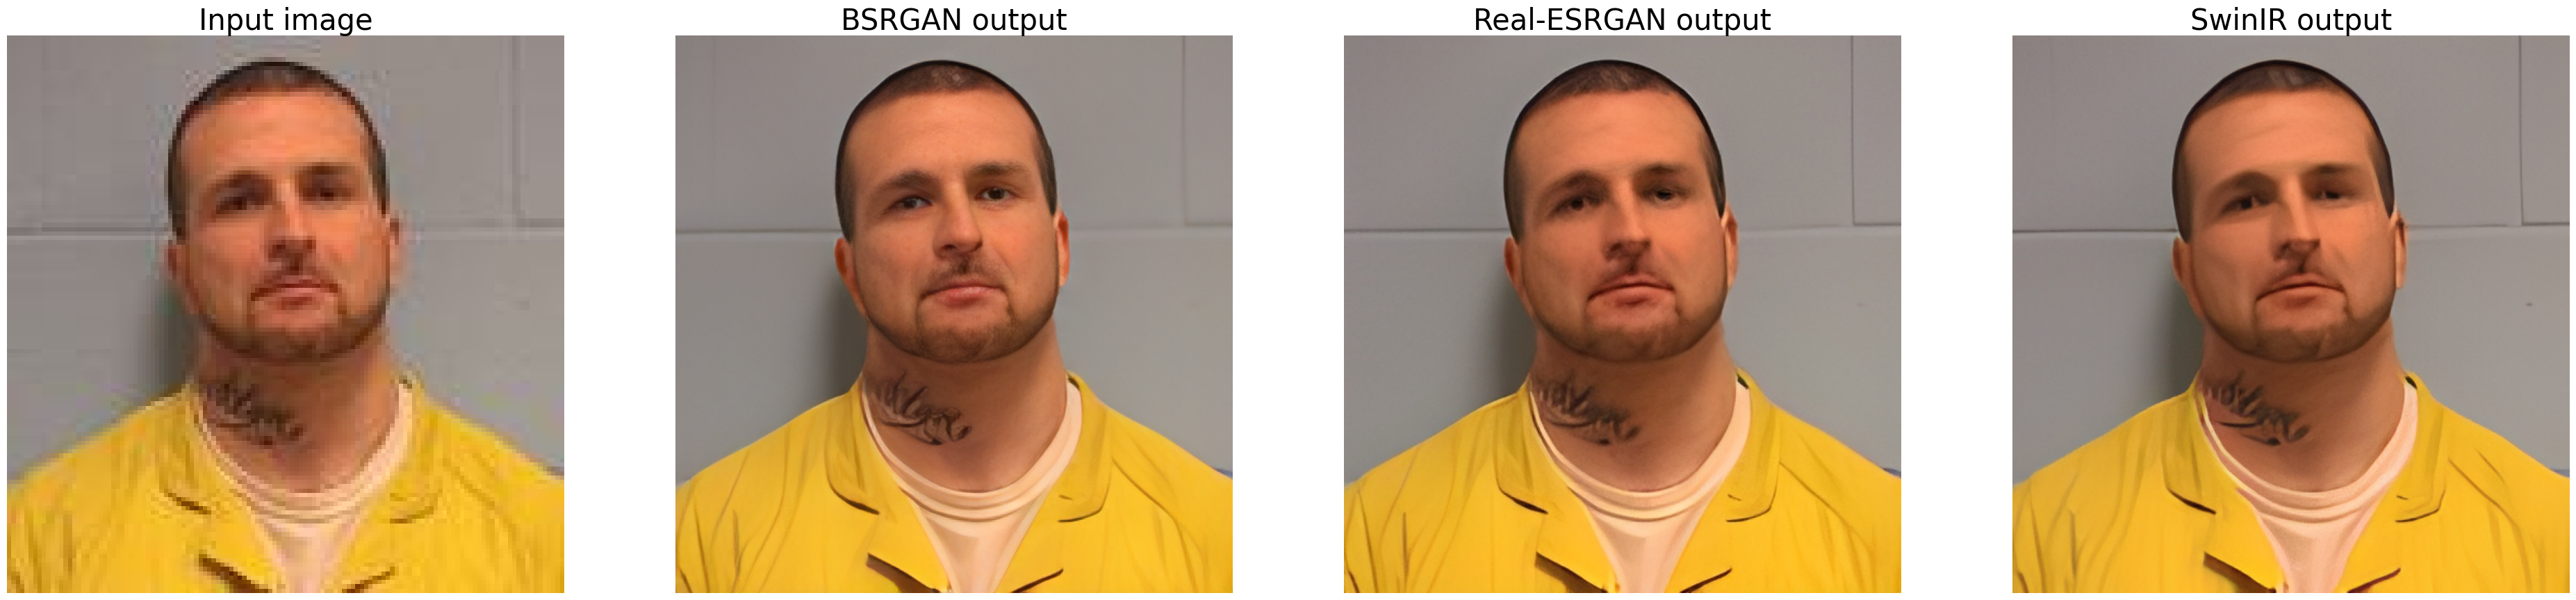

In [ ]:
# utils for visualization
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  total_figs = 5
  fig = plt.figure(figsize=(total_figs*12, 14))
  ax1 = fig.add_subplot(1, total_figs, 1)
  plt.title('Input image', fontsize=30)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, total_figs, 2)
  plt.title('BSRGAN output', fontsize=30)
  ax2.axis('off')
  ax3 = fig.add_subplot(1, total_figs, 3)
  plt.title('Real-ESRGAN output', fontsize=30)
  ax3.axis('off')
  ax4 = fig.add_subplot(1, total_figs, 4)
  plt.title('SwinIR output', fontsize=30)
  ax4.axis('off')
  # ax5 = fig.add_subplot(1, total_figs, 5)
  # plt.title('SwinIR-Large (ours) output', fontsize=30)
  # ax5.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2['BSRGAN'])
  ax3.imshow(img2['realESRGAN'])
  ax4.imshow(img2['SwinIR'])
  # ax5.imshow(img2['SwinIR-L'])

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
print('Note: BSRGAN may be better at face restoration, but worse at building restoration because it uses different datasets in training.')
if test_patch_wise:
  print('BSRGAN does not support "test_patch_wise" mode for now. Set test_patch_wise = False to see its results.\n')
else:
  print('\n')
input_folder = upload_folder
result_folder = 'results/SwinIR'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = {}
  img_output['SwinIR'] = imread(output_path)
  img_output['SwinIR-L'] = imread(output_path.replace('SwinIR/', 'SwinIR_large/').replace('SwinIR.png', 'SwinIR_large.png'))
  if test_patch_wise:
    img_output['BSRGAN'] = img_output['SwinIR']*0+255
  else:
    img_output['BSRGAN'] = imread(output_path.replace('SwinIR', 'BSRGAN'))
  path = output_path.replace('/SwinIR/', '/realESRGAN/').replace('_SwinIR.png','_out{}'.format(os.path.splitext(input_path)[1]))
  if os.path.exists(path):
    shutil.move(path, path.replace('_out.', '_realESRGAN.'))
  img_output['realESRGAN'] = imread(path.replace('_out.', '_realESRGAN.'))

  display(img_input, img_output)

# 5. Download Results


In [ ]:
# Download the results
zip_filename = 'SwinIR_result.zip'
if os.path.exists(zip_filename):
  os.remove(zip_filename)
os.system(f"zip -r -j {zip_filename} results/*")
files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>